# Computational Finance: Assignment 2

In [11]:
import numpy as np
import datetime as dt
from src.data_retrieval import get_amsterdam_temperature_data
from src.exploratory_analysis import (plot_time_series_with_rolling_stats,
                                      decompose_time_series,
                                      plot_decomposition)
from src.residual_analysis import (plot_residual_histogram,
                                   plot_qq,
                                   plot_acf_pacf,
                                   perform_adf_test,
                                   check_residual_autocorrelation)
from src.stochastic_model import (fit_arima_model,
                                  simulate_temperature,
                                  plot_simulations)
from src.model_fitting import (fit_deterministic_model,
                               plot_deterministic_fit,
                               fit_ar_model,
                               plot_ar_model_diagnostics,
                               simulate_temperature_with_ar,
                               plot_temperature_forecast)
from src.option_pricing import (simulate_temperature_paths,
                                calculate_cumulative_degree_days,
                                call_option_payoff,
                                put_option_payoff,
                                collar_option_payoff,
                                price_option,
                                plot_degree_day_distribution,
                                plot_option_payoff_distribution,
                                calculate_option_metrics,
                                plot_temperature_paths,
                                plot_cumulative_dd_paths)

In [2]:
# Part A: Data Retrieval
print("Retrieving temperature data for Amsterdam...")
daily_data = get_amsterdam_temperature_data(start_date="2020-08-10", end_date="2024-05-01")

print("Daily temperature data for Amsterdam:")
print(daily_data.head())
print(f"Data shape: {daily_data.shape}")
print(f"Missing values: {daily_data.isna().sum().sum()}")

Retrieving temperature data for Amsterdam...
Daily temperature data for Amsterdam:
                           temperature_2m_mean
2020-08-10 00:00:00+00:00              6.90975
2020-08-11 00:00:00+00:00              6.90975
2020-08-12 00:00:00+00:00              6.90975
2020-08-13 00:00:00+00:00              6.90975
2020-08-14 00:00:00+00:00              6.90975
Data shape: (1361, 1)
Missing values: 0


/Users/andrew/Desktop/Computational Science/CompFinance/lab2/src/data_retrieval.py:88: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_df = cleaned_df.fillna(method='ffill').fillna(method='bfill')



Performing exploratory data analysis...


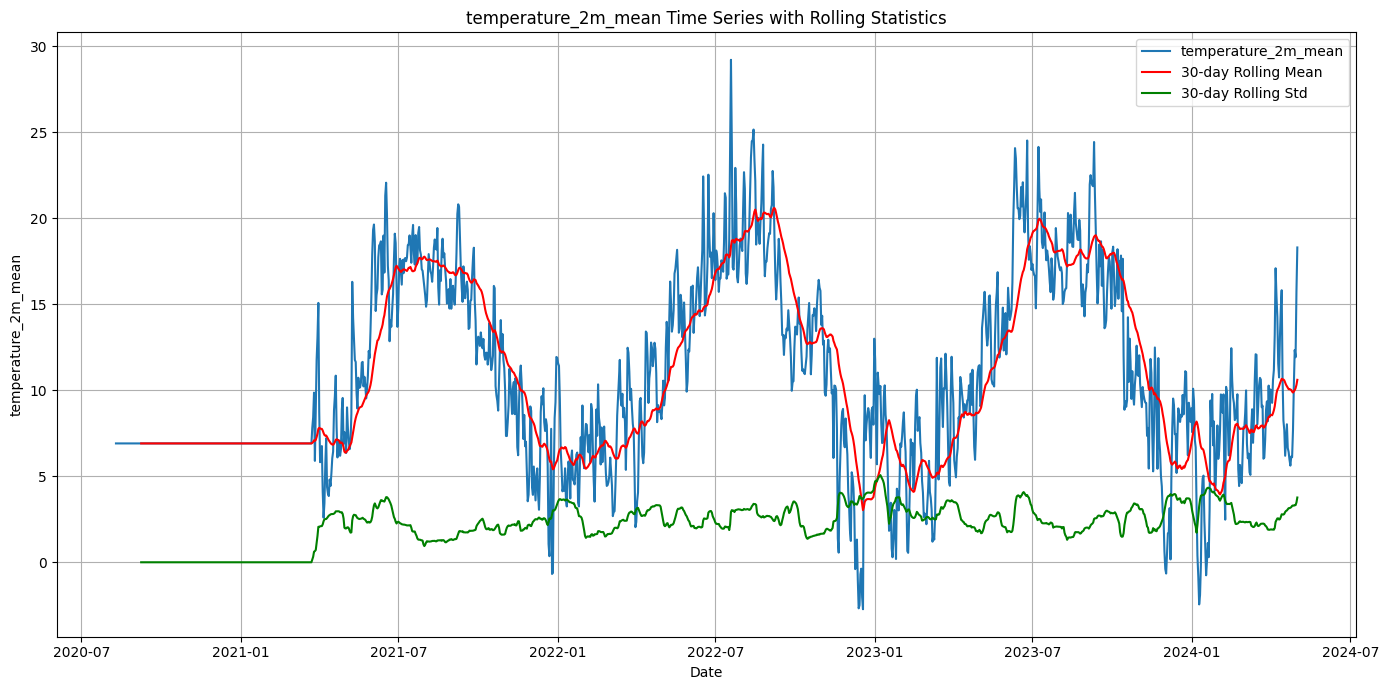

In [3]:
# Part B: Exploratory Data Analysis
print("\nPerforming exploratory data analysis...")
plot_time_series_with_rolling_stats(daily_data, 'temperature_2m_mean', window=30)

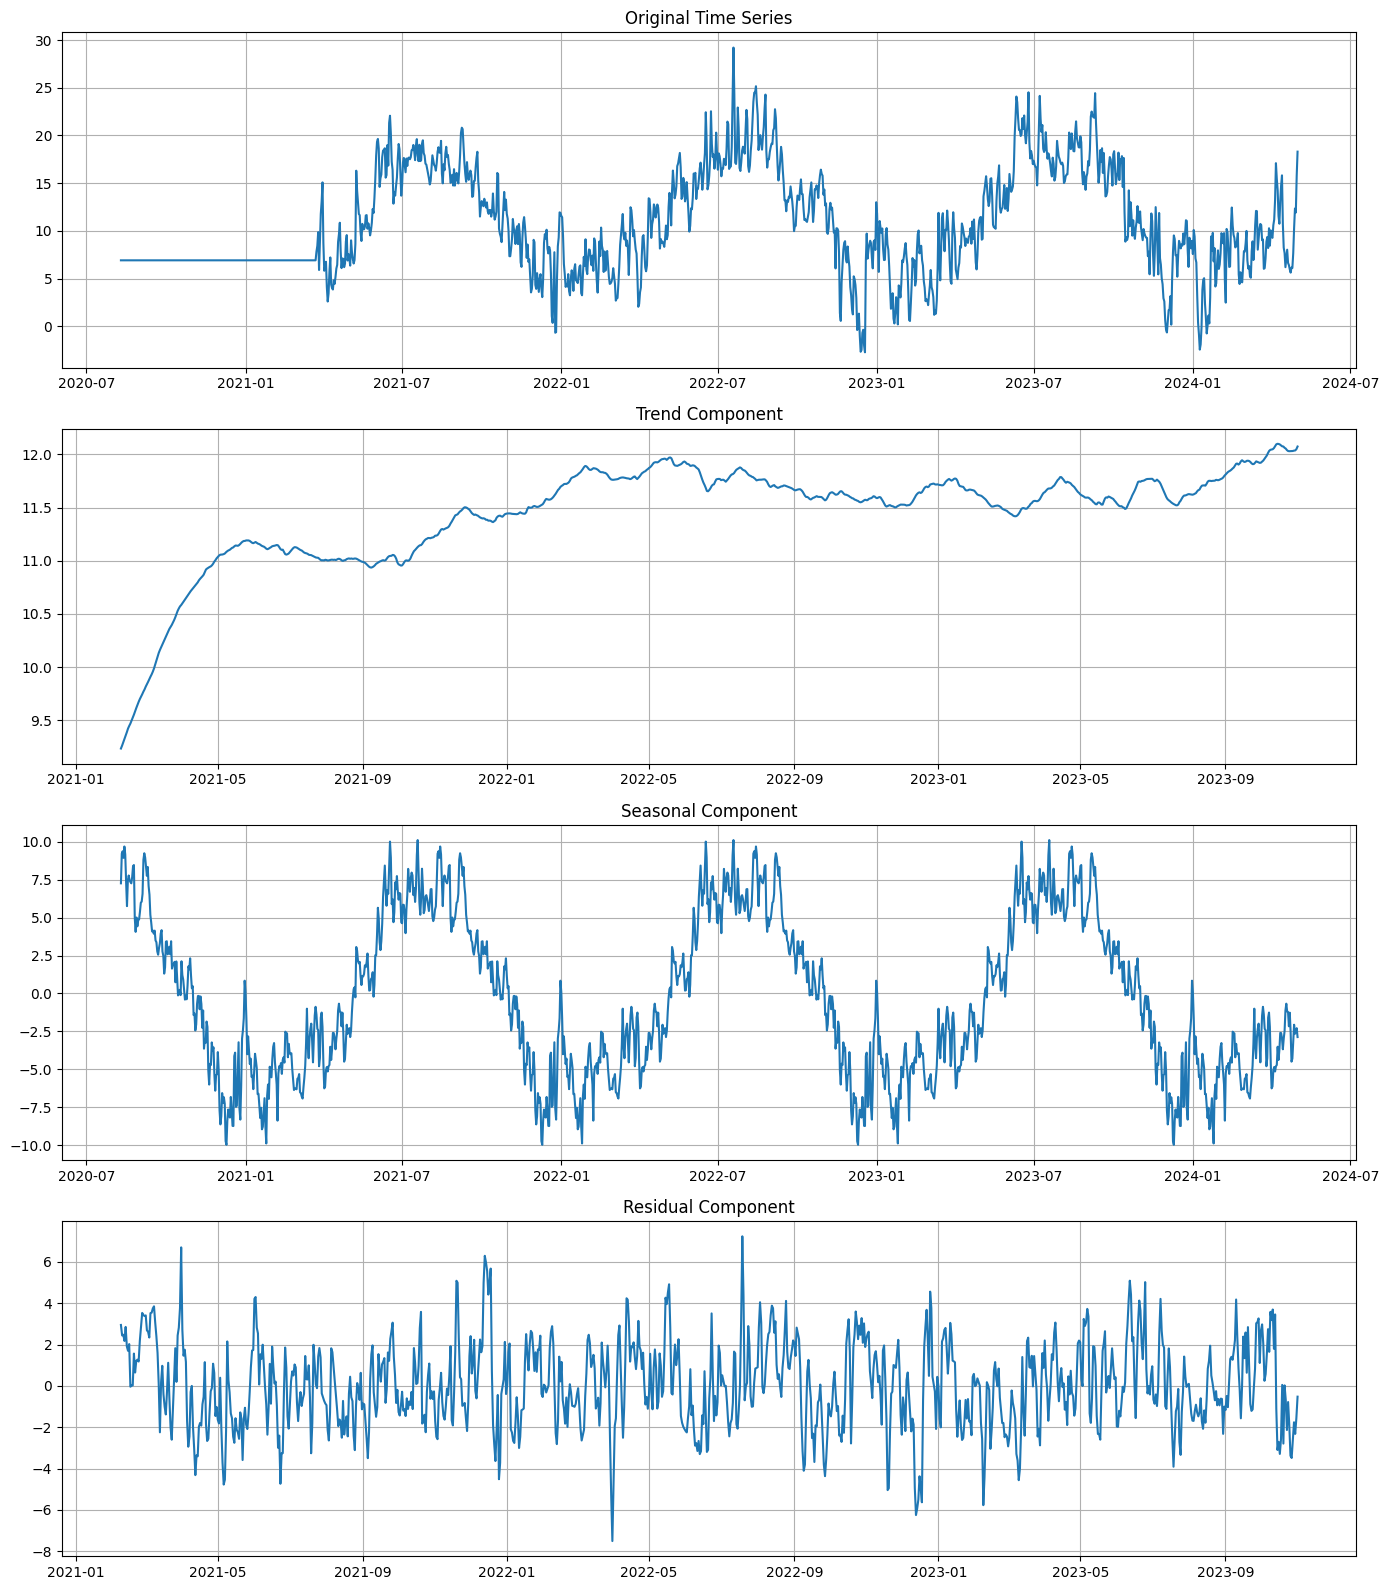


Analyzing residuals...


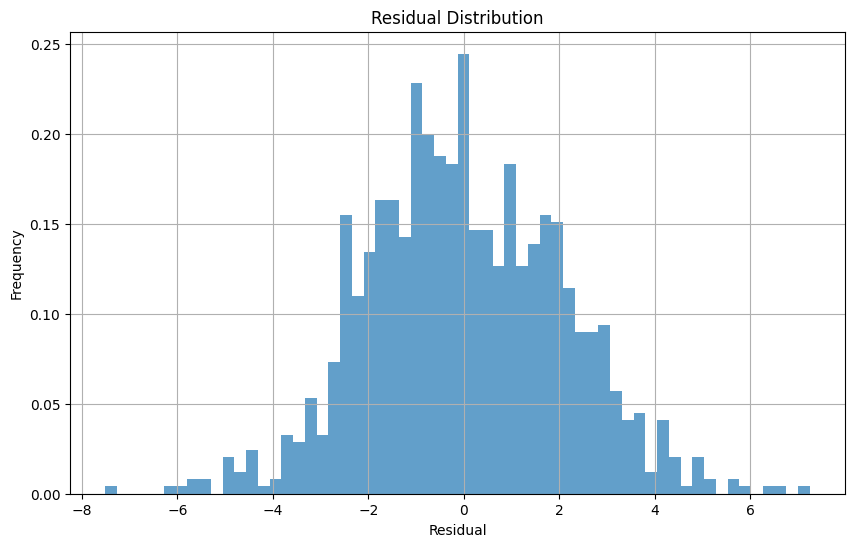

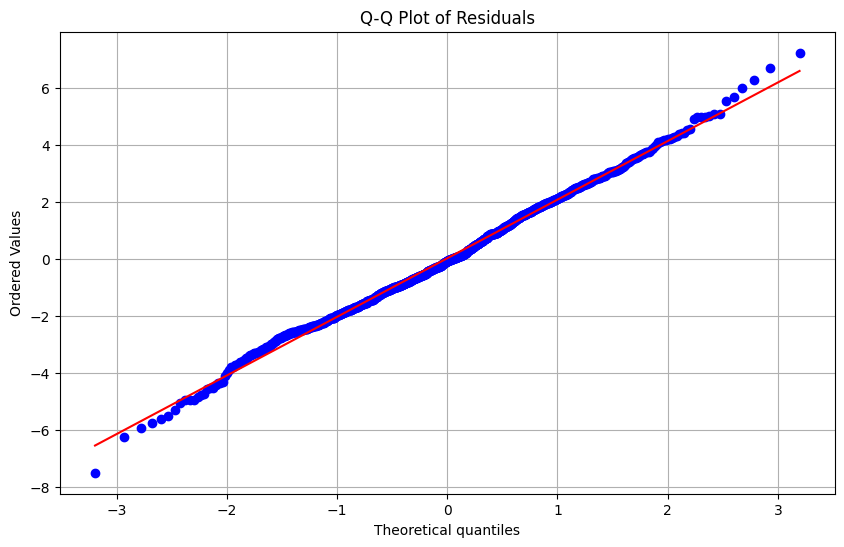

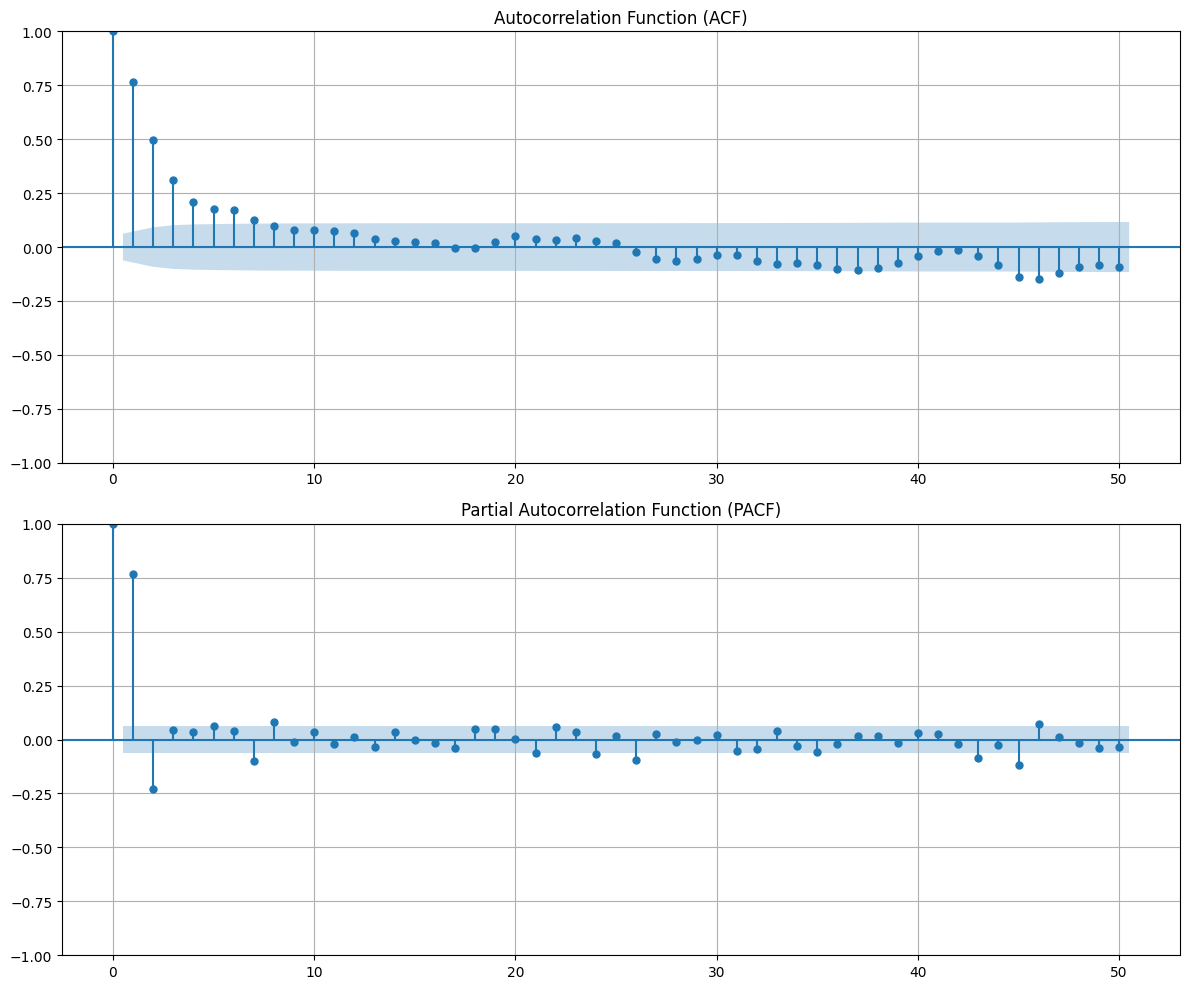

In [4]:
decompose_result = decompose_time_series(daily_data, 'temperature_2m_mean', period=365)
trend, seasonal, residual = plot_decomposition(decompose_result, daily_data['temperature_2m_mean'])
    
# Residual Analysis
print("\nAnalyzing residuals...")
plot_residual_histogram(residual)
plot_qq(residual)
plot_acf_pacf(residual, lags=50)

In [5]:
# Stationarity Test
print("\nTesting for stationarity...")
adf_result = perform_adf_test(residual)


Testing for stationarity...
ADF Statistic: -8.226346
p-value: 0.000000
Critical Values:
   1%: -3.436979275944879
   5%: -2.8644668170148058
   10%: -2.5683283824496153
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


Ljung-Box Test for Autocorrelation:
        lb_stat      lb_pvalue
10  1072.450905  4.577930e-224
20  1088.397686  5.330032e-218
30  1106.312816  1.729018e-213

Fitting ARIMA model to residuals...
                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  997
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1661.446
Date:                Sat, 10 May 2025   AIC                           3332.892
Time:                        01:31:02   BIC                           3357.416
Sample:                    02-08-2021   HQIC                          3342.214
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        

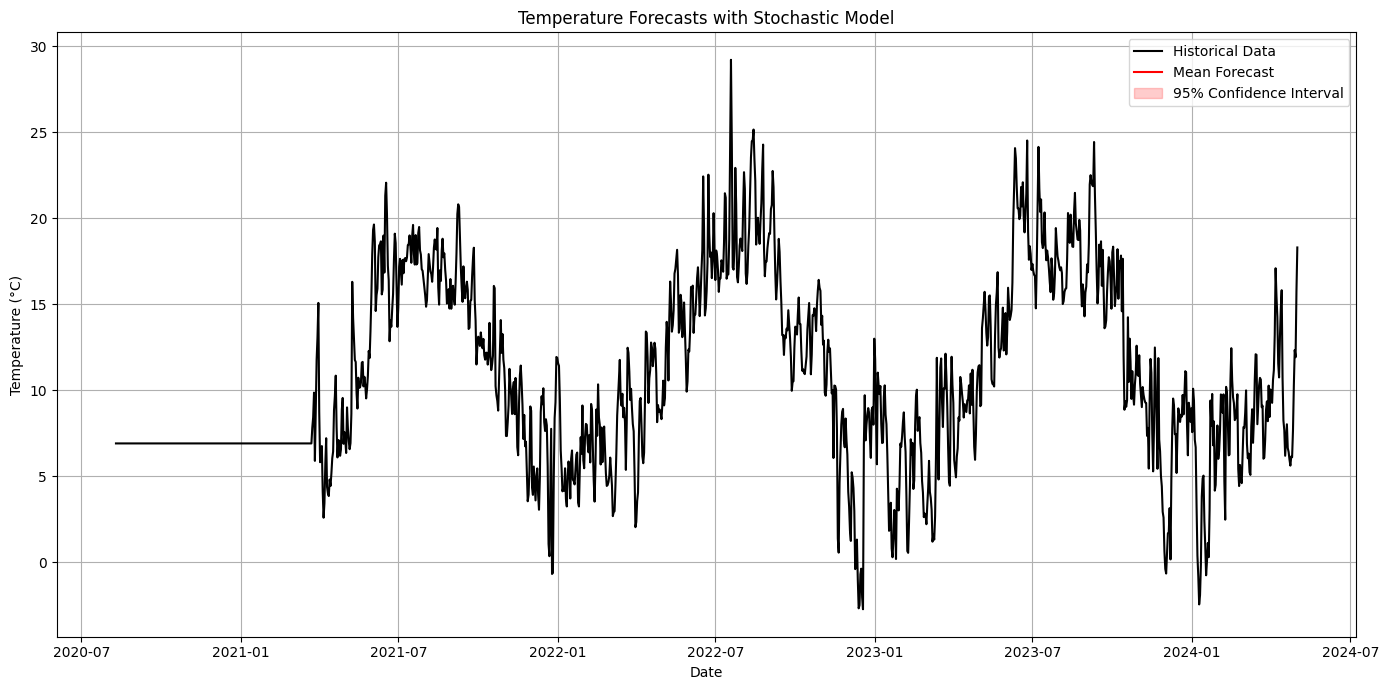

In [6]:
# Autocorrelation Check
lb_result = check_residual_autocorrelation(residual, lags=[10, 20, 30])

# Fit ARIMA model to residuals
print("\nFitting ARIMA model to residuals...")
# Choose order based on ACF/PACF plots
arima_model = fit_arima_model(residual, order=(2, 0, 1))

# Simulate future temperatures
print("\nSimulating future temperatures...")
simulations = simulate_temperature(trend, seasonal, arima_model, n_steps=365, n_simulations=10)

# Plot simulations
plot_simulations(daily_data, simulations)



Part C: Fitting deterministic model and AR process...

Fitting deterministic seasonal model...
Estimated parameters:
a (intercept): 9.2616
b (trend): 0.002629
alpha (amplitude): 6.1234
theta (phase): 1.8848


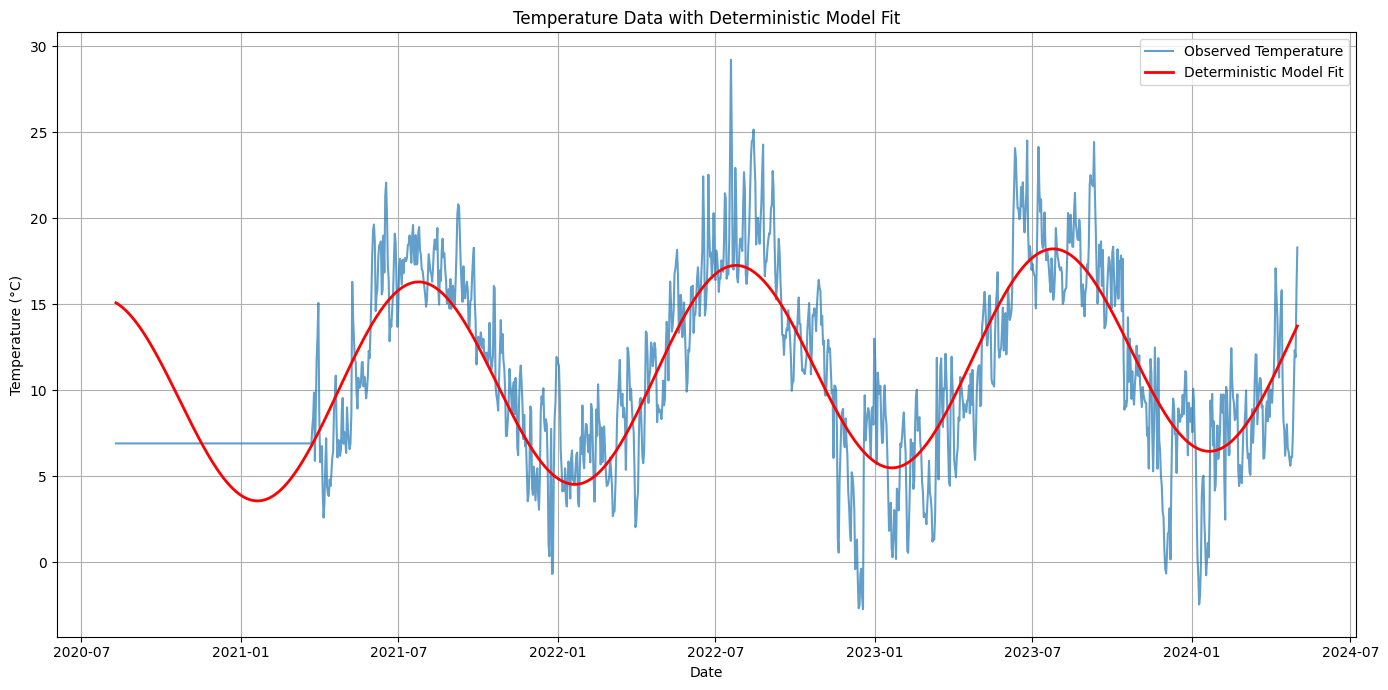

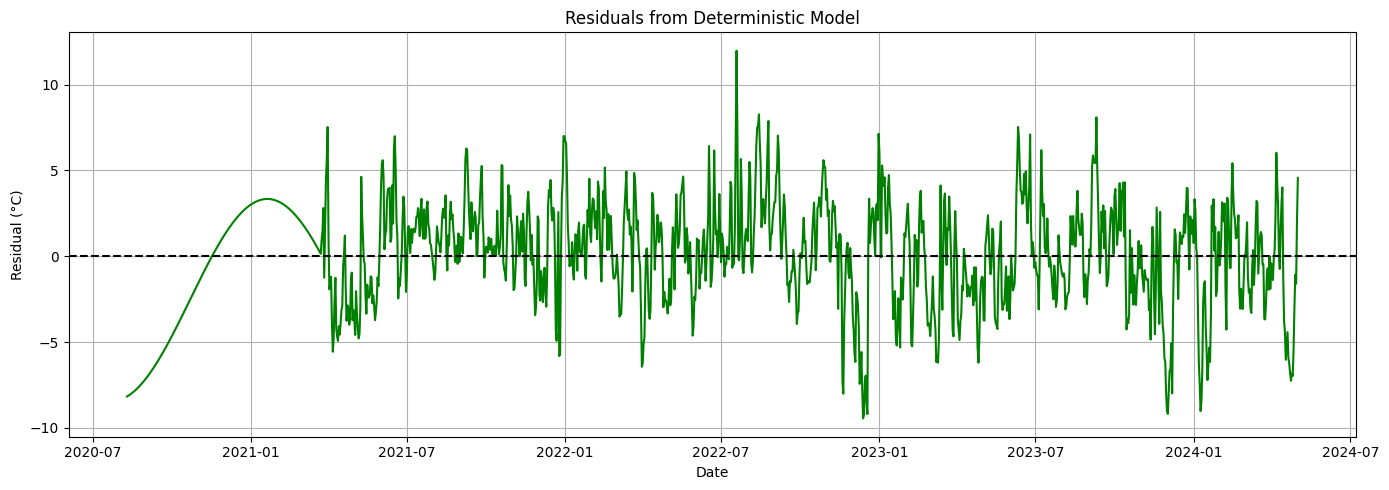


Fitting AR model to residuals...
Best AR order (p) based on AIC: 10
AIC value: 5138.8136

Autoregressive model summary:
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1361
Model:                    AutoReg(10)   Log Likelihood               -2557.407
Method:               Conditional MLE   S.D. of innovations              1.606
Date:                Sat, 10 May 2025   AIC                           5138.814
Time:                        01:31:03   BIC                           5201.317
Sample:                            10   HQIC                          5162.220
                                 1361                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0162      0.044      0.370      0.711      -0.069       0.102
y.L1      

/Users/andrew/Desktop/Computational Science/CompFinance/lab2/src/model_fitting.py:183: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ar_coef = best_model.params[1]  # First AR coefficient


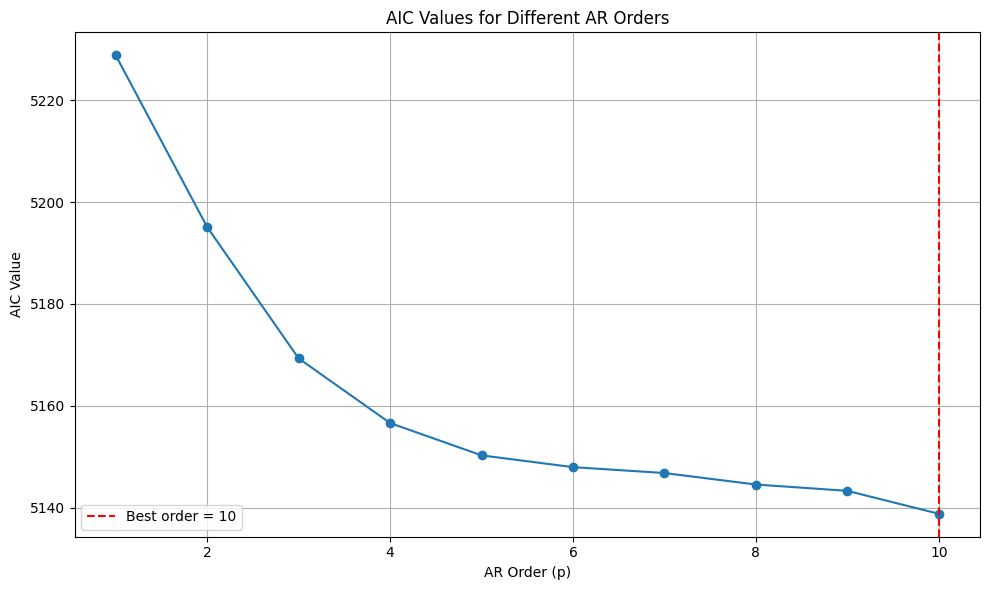

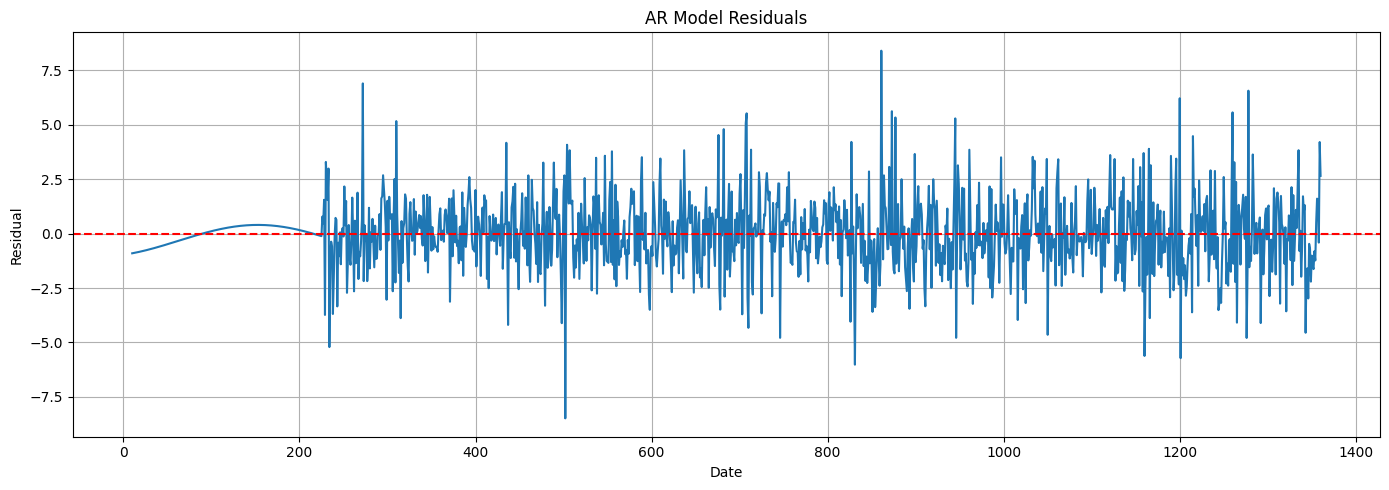

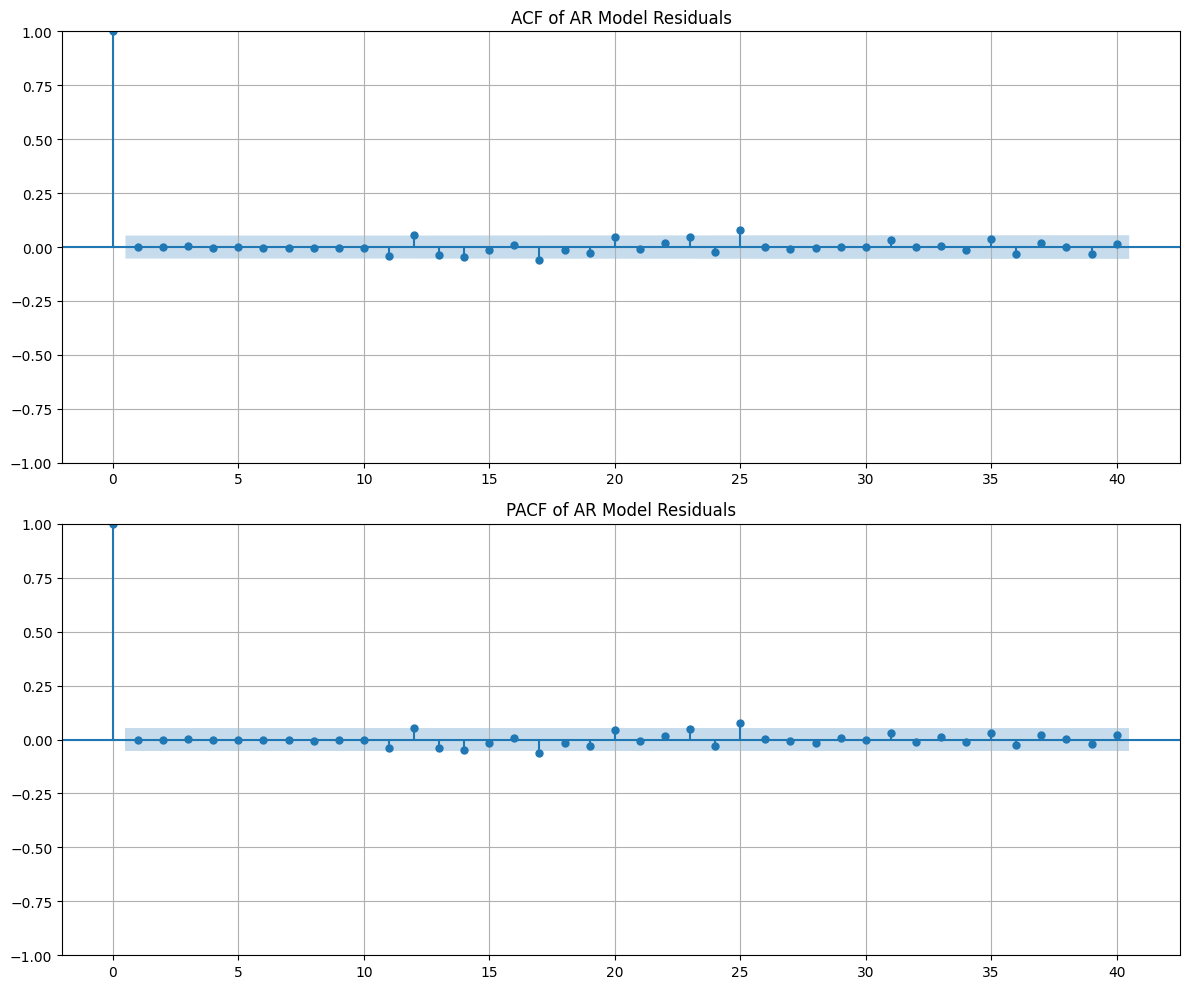

<Figure size 1000x600 with 0 Axes>

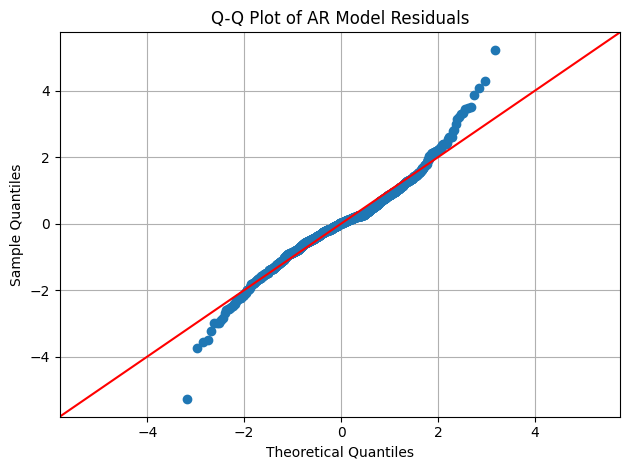

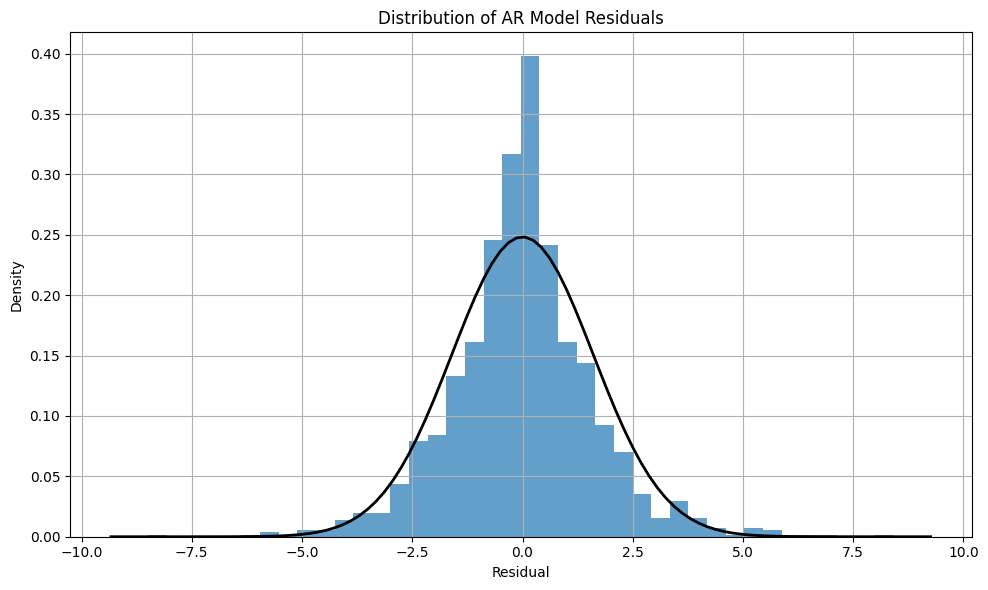


Simulating future temperatures with deterministic-AR model...


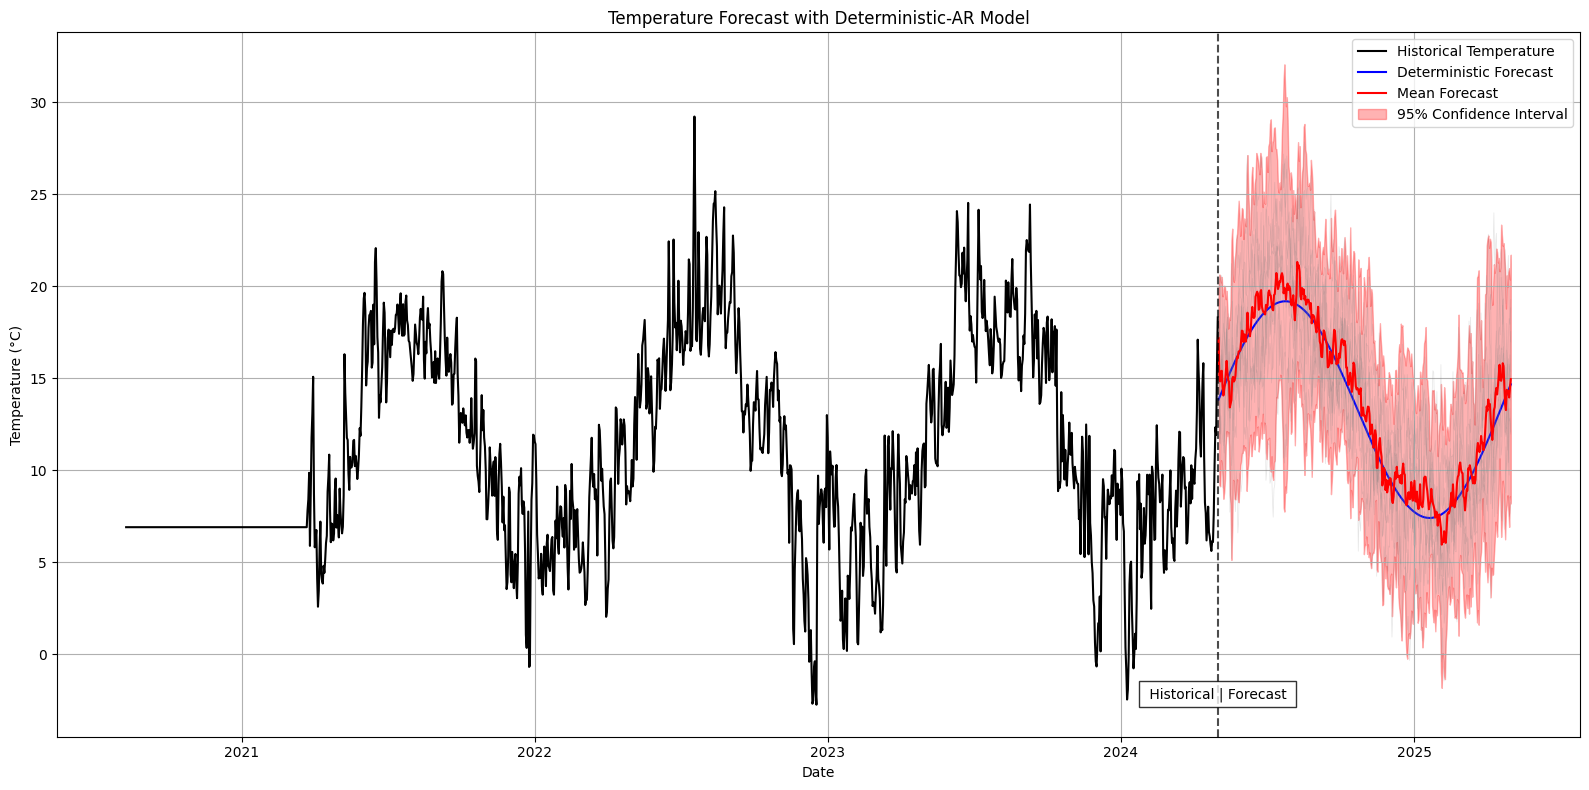

In [7]:
# Part C: Fitting the Model under P
print("\n\nPart C: Fitting deterministic model and AR process...")

# Task 1: Deterministic Model Fitting
print("\nFitting deterministic seasonal model...")
det_model_result = fit_deterministic_model(daily_data, column='temperature_2m_mean')
plot_deterministic_fit(daily_data, det_model_result, column='temperature_2m_mean')

# Task 2: Autoregressive Modeling of Residuals
print("\nFitting AR model to residuals...")
ar_model_result = fit_ar_model(det_model_result['residuals'], max_order=10)
plot_ar_model_diagnostics(ar_model_result['model'])

# Simulate future temperatures
print("\nSimulating future temperatures with deterministic-AR model...")
simulations = simulate_temperature_with_ar(
    daily_data, 
    det_model_result, 
    ar_model_result, 
    n_steps=365, 
    n_simulations=10, 
    column='temperature_2m_mean'
)

# Plot forecast
plot_temperature_forecast(daily_data, simulations, column='temperature_2m_mean')




Part D: Pricing temperature options using Monte Carlo simulation...

Simulating temperature paths for option pricing...


Simulating temperature paths: 100%|██████████| 1000/1000 [00:01<00:00, 708.98it/s]


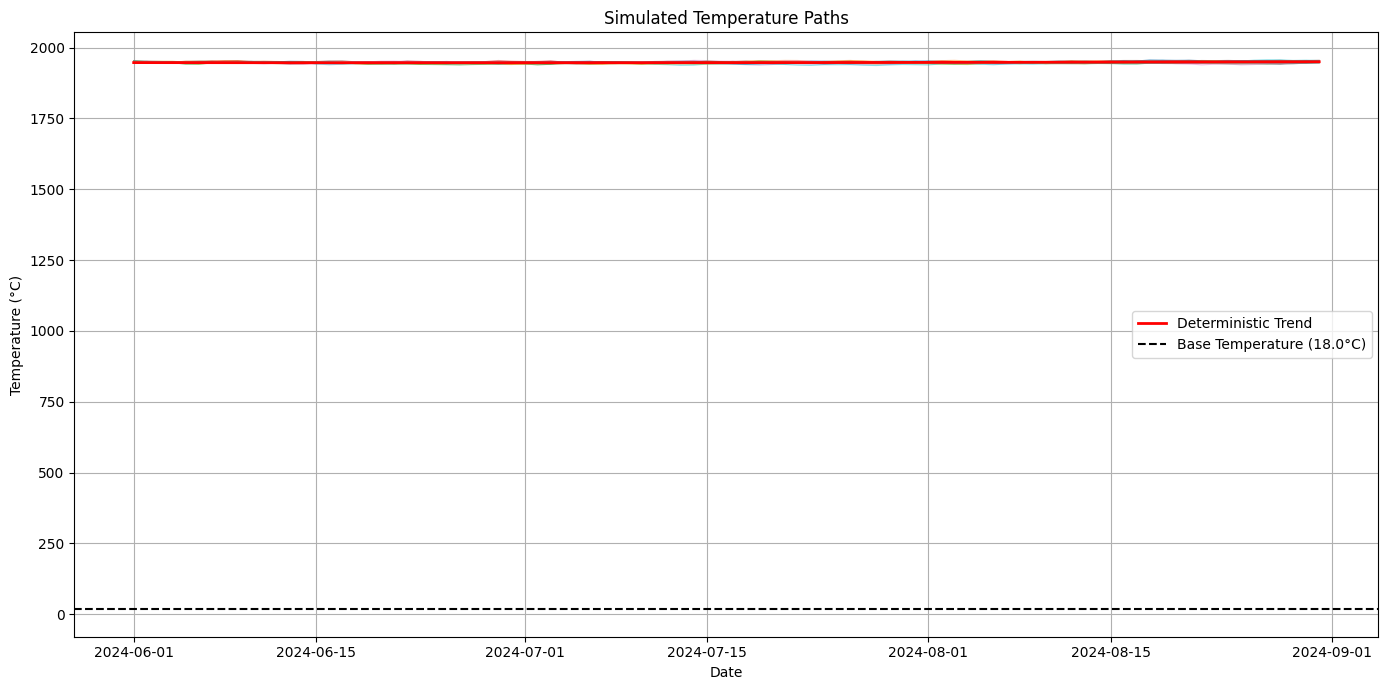

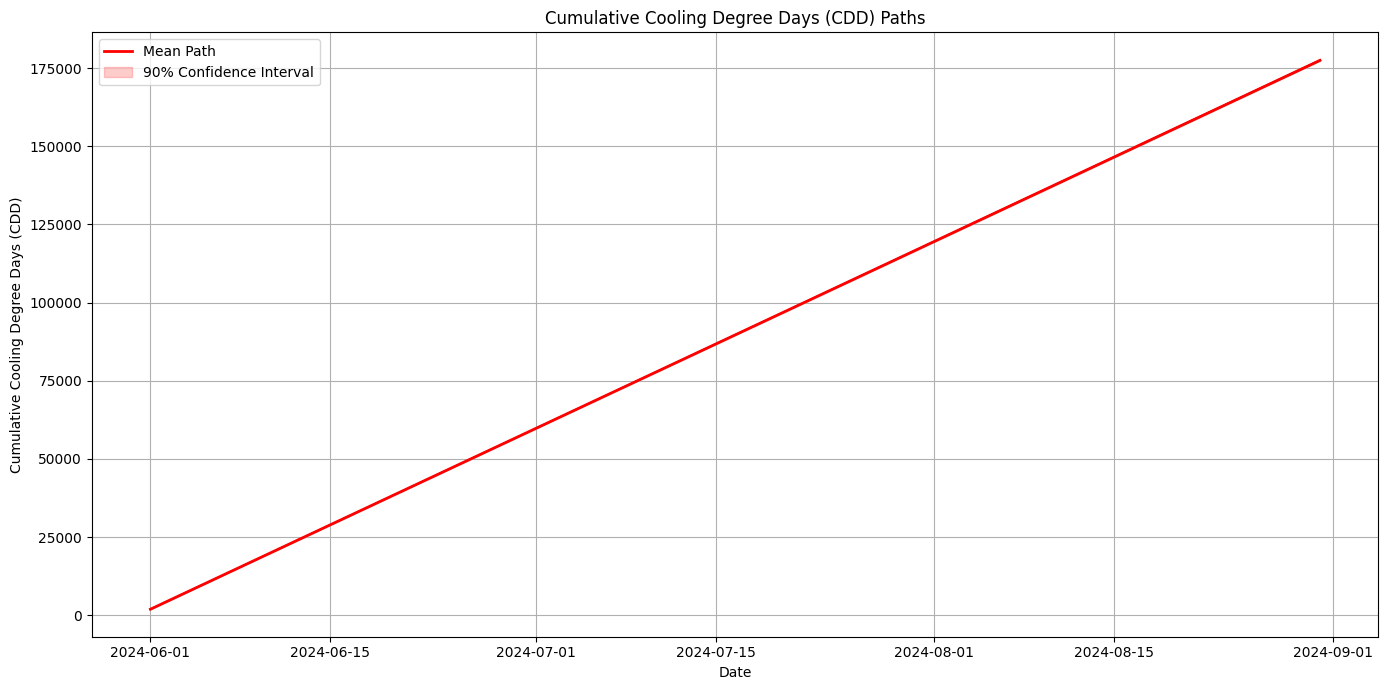

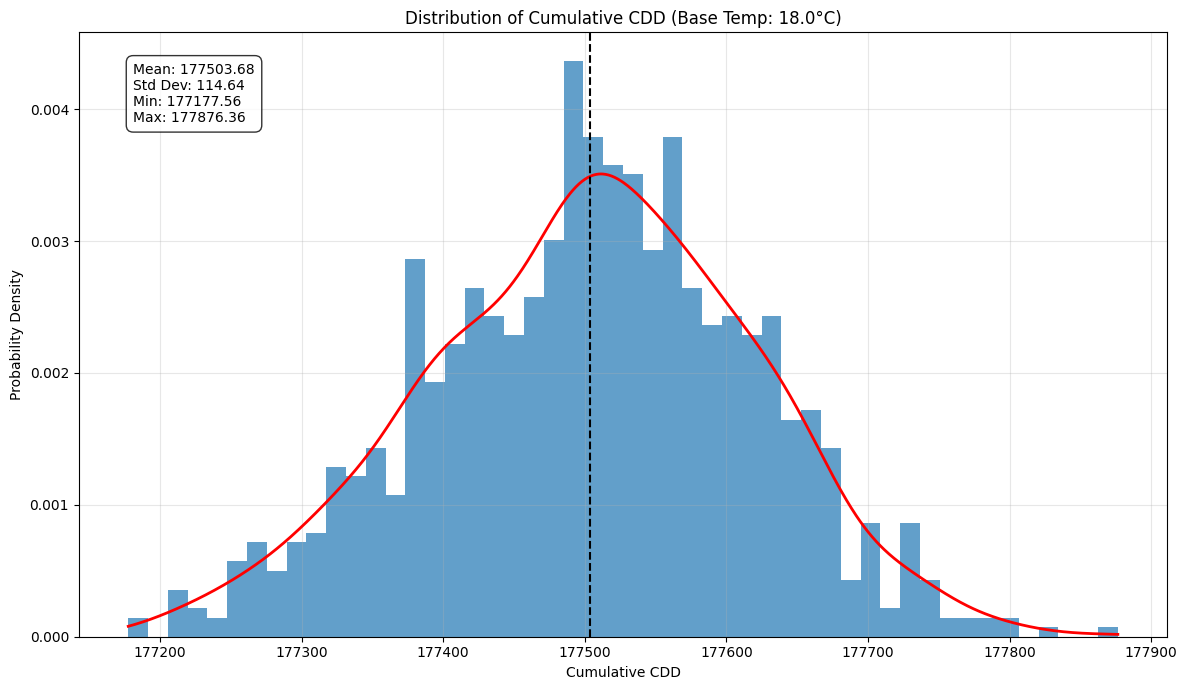


Calculating option payoffs and prices...

Call Option (Strike = 177504, Cap = 22927.00):
Price: $4463.78
Mean Payoff: $4497.27
Max Payoff: $22927.00
95% VaR: $-0.00
Probability of Zero Payoff: 48.80%


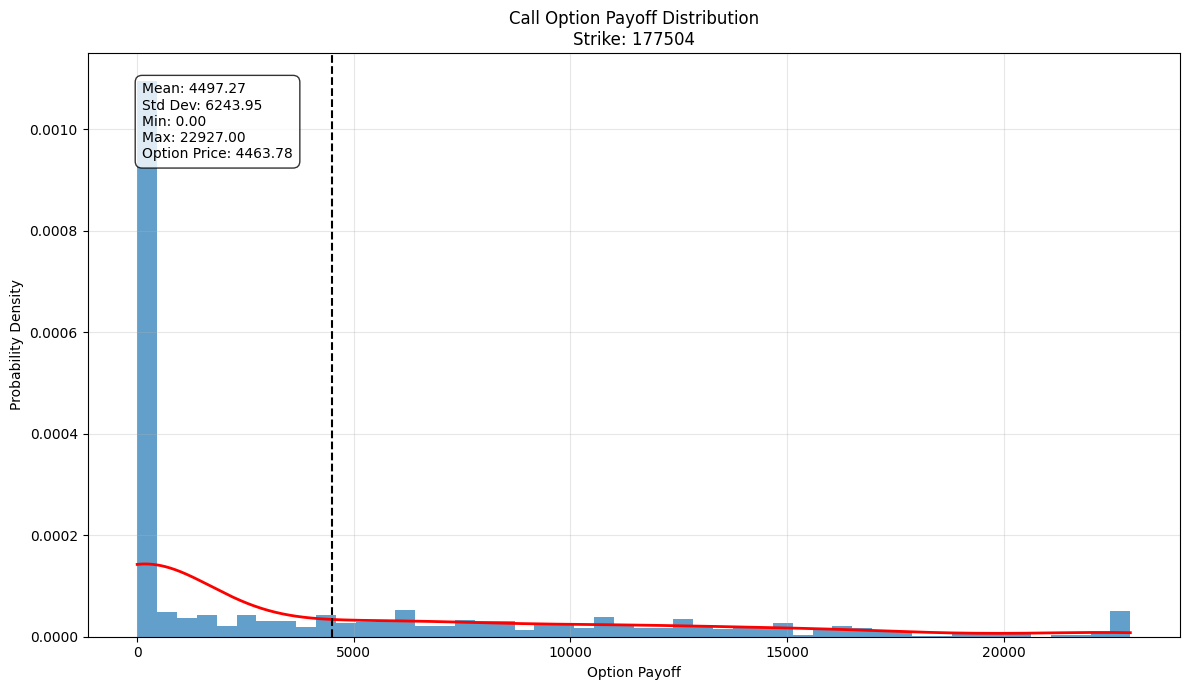


Put Option (Strike = 177504, Floor = 22927.00):
Price: $4466.58
Mean Payoff: $4500.09
Max Payoff: $22927.00
95% VaR: $-0.00
Probability of Zero Payoff: 51.20%


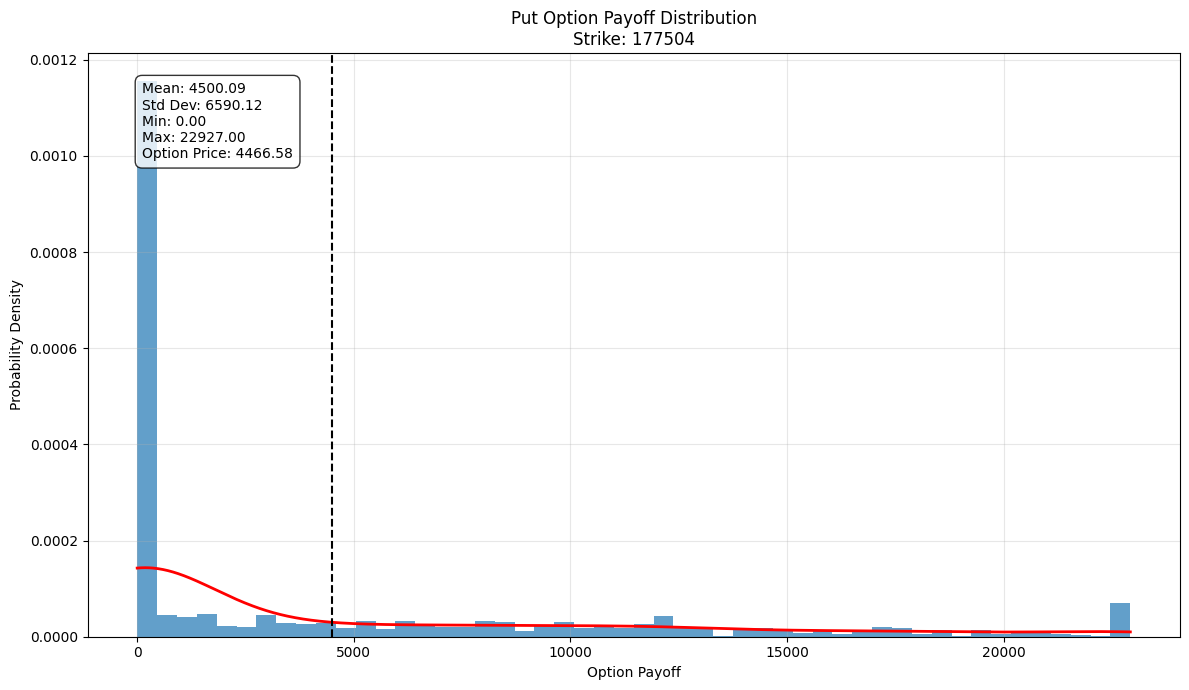


Collar Option (Call Strike = 177446, Put Strike = 177561):
Price: $281.37
Mean Payoff: $283.48
Min Payoff: $-22927.00
Max Payoff: $22927.00
95% VaR: $22927.00


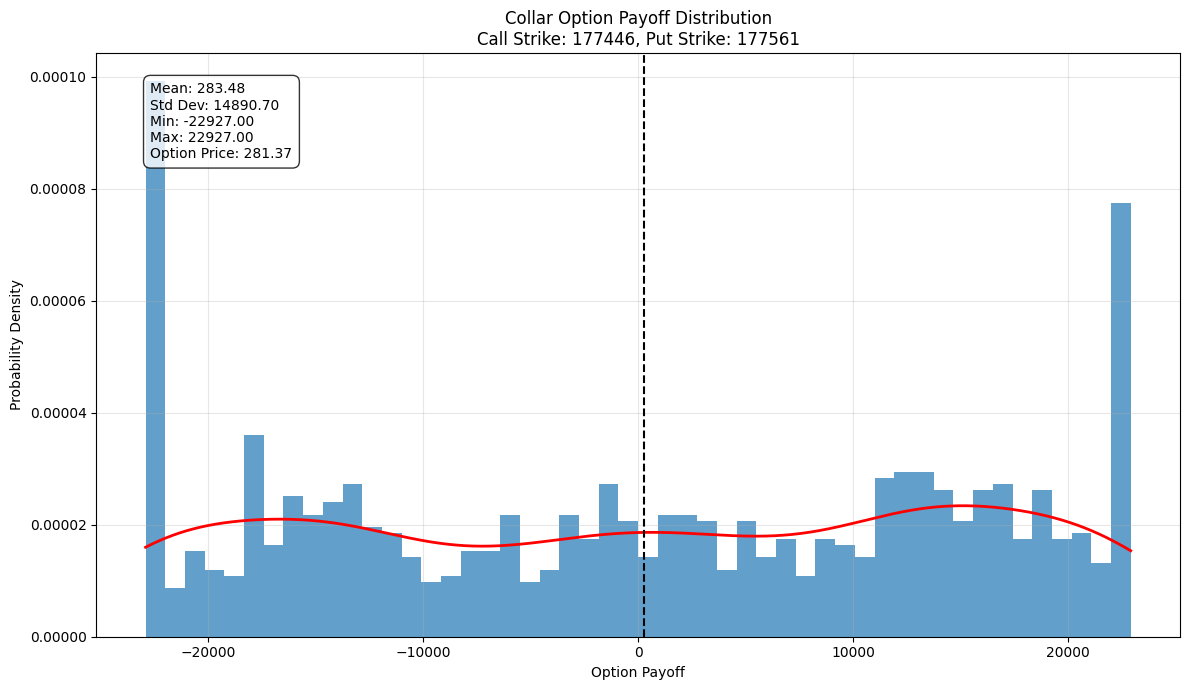

In [14]:
# Part D: Pricing Temperature Options
print("\n\nPart D: Pricing temperature options using Monte Carlo simulation...")

# Set simulation parameters
start_date = dt.datetime(2024, 6, 1)  # Start date for option period
end_date = dt.datetime(2024, 8, 31)   # End date for option period (summer)
risk_free_rate = 0.03                 # Annual risk-free rate
base_temp = 18.0                      # Base temperature for degree days

# Task 1: Monte Carlo Simulation of Temperature Paths
print("\nSimulating temperature paths for option pricing...")
simulation_results = simulate_temperature_paths(
    det_model_result,
    ar_model_result,
    start_date,
    end_date,
    n_paths=1000,
    base_temp=base_temp
)

# Plot some of the simulated paths
plot_temperature_paths(simulation_results, n_paths_to_show=20)

# Decide whether to use HDD or CDD based on season
degree_day_type = 'cdd'

# Plot cumulative degree day paths
plot_cumulative_dd_paths(simulation_results, degree_day_type=degree_day_type, n_paths_to_show=20)

# Calculate cumulative degree days
cum_dd = calculate_cumulative_degree_days(simulation_results, degree_day_type=degree_day_type)

# Plot distribution of cumulative degree days
dd_label = 'CDD' if degree_day_type == 'cdd' else 'HDD'
plot_degree_day_distribution(cum_dd, dd_label, base_temp)

# Task 2: Calculate Option Payoffs and Prices
print("\nCalculating option payoffs and prices...")

# Time to maturity in years
time_to_maturity = (end_date - start_date).days / 365.25

# Set option parameters
mean_dd = np.mean(cum_dd)
std_dd = np.std(cum_dd)

# Strike prices at different levels relative to expected DD
atm_strike = round(mean_dd)                 # At-the-money
otm_call_strike = round(mean_dd - 0.5 * std_dd)  # Out-of-the-money call
otm_put_strike = round(mean_dd + 0.5 * std_dd)   # Out-of-the-money put

# Multipliers and caps/floors
alpha = 100  # $100 per degree day
cap = alpha * 2 * std_dd  # Cap at 2 standard deviations
floor = alpha * 2 * std_dd  # Floor at 2 standard deviations

# Price Call Option
call_payoffs = call_option_payoff(cum_dd, atm_strike, alpha, cap)
call_price = price_option(call_payoffs, risk_free_rate, time_to_maturity)

print(f"\nCall Option (Strike = {atm_strike}, Cap = {cap:.2f}):")
print(f"Price: ${call_price:.2f}")
call_metrics = calculate_option_metrics(call_payoffs)
print(f"Mean Payoff: ${call_metrics['mean']:.2f}")
print(f"Max Payoff: ${call_metrics['max']:.2f}")
print(f"95% VaR: ${-call_metrics['VaR_95']:.2f}")
print(f"Probability of Zero Payoff: {call_metrics['zero_probability']:.2%}")

plot_option_payoff_distribution(call_payoffs, 'Call', atm_strike, call_price)

# Price Put Option
put_payoffs = put_option_payoff(cum_dd, atm_strike, alpha, floor)
put_price = price_option(put_payoffs, risk_free_rate, time_to_maturity)

print(f"\nPut Option (Strike = {atm_strike}, Floor = {floor:.2f}):")
print(f"Price: ${put_price:.2f}")
put_metrics = calculate_option_metrics(put_payoffs)
print(f"Mean Payoff: ${put_metrics['mean']:.2f}")
print(f"Max Payoff: ${put_metrics['max']:.2f}")
print(f"95% VaR: ${-put_metrics['VaR_95']:.2f}")
print(f"Probability of Zero Payoff: {put_metrics['zero_probability']:.2%}")

plot_option_payoff_distribution(put_payoffs, 'Put', atm_strike, put_price)

# Price Collar Option
collar_payoffs = collar_option_payoff(
    cum_dd, 
    otm_call_strike, 
    otm_put_strike, 
    alpha, 
    alpha, 
    cap, 
    floor
)
collar_price = price_option(collar_payoffs, risk_free_rate, time_to_maturity)

print(f"\nCollar Option (Call Strike = {otm_call_strike}, Put Strike = {otm_put_strike}):")
print(f"Price: ${collar_price:.2f}")
collar_metrics = calculate_option_metrics(collar_payoffs)
print(f"Mean Payoff: ${collar_metrics['mean']:.2f}")
print(f"Min Payoff: ${collar_metrics['min']:.2f}")
print(f"Max Payoff: ${collar_metrics['max']:.2f}")
print(f"95% VaR: ${-collar_metrics['VaR_95']:.2f}")

plot_option_payoff_distribution(collar_payoffs, 'Collar', (otm_call_strike, otm_put_strike), collar_price)